# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:

1. Inisiasi jumlah kluster secara random

2. Tentukan posisi centroid secara random.

3. Hitung jarak antara data point ke centroid. Assign setiap data ke centroid terdekat (hal ini akan membentuk  k clusters).Perhitungan jarak antara titik data ke centroid menggunakan formula euclidean distance. 

4.  Kemudian hitung ulang centroid berdasarkan label-label data sebelumnya. Disini kita buat kembali centroid baru dan menghitung kembali jarak antar data poin ke centroid.

 5. Kemudian di assign kembali data poin ke centroid terdekat yang terbaru, dan kita cek apakah ada perubahan dalam cluster atau tidak, jika ada maka kita perlu kembali ke poin






---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [65]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [66]:
#code here
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
 
df=df.fillna(method="ffill")

def get_lower_upper_bound(x) :
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3-q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 - (1.5*iqr)
    return lower_bound, upper_bound

def get_outliers_iqr(x):
    lower_bound, upper_bound = get_lower_upper_bound(x)
    return x[np.where((x > upper_bound) | (x < lower_bound))]

def remove_outlier_iqr(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    df_final = df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
    return df_final

df2 = remove_outlier_iqr(df[['Umur','Skor Belanja (1-100)']])

df2.dropna(axis=0, inplace=True)

In [67]:
sc = StandardScaler()
df_std = sc.fit_transform(df2.astype(float))

In [68]:

kmeans1 = KMeans(n_clusters=2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0])

In [69]:
new_df = pd.DataFrame(data = df_std, columns=['Umur','Skor Belanja (1-100)'])
new_df['label_kmeans1'] = labels1
new_df

,Umur,Skor Belanja (1-100),label_kmeans1
0,-1.455005,-0.396407,0
1,-1.304215,1.119369,0
2,-1.379610,-1.587373,1
3,-1.153425,0.975009,0
4,-0.550263,-0.360317,0
...,...,...,...
243,-0.851844,0.686290,0
244,1.560802,-1.298654,1
245,-0.248682,1.444178,0
246,-0.097892,-0.649036,1


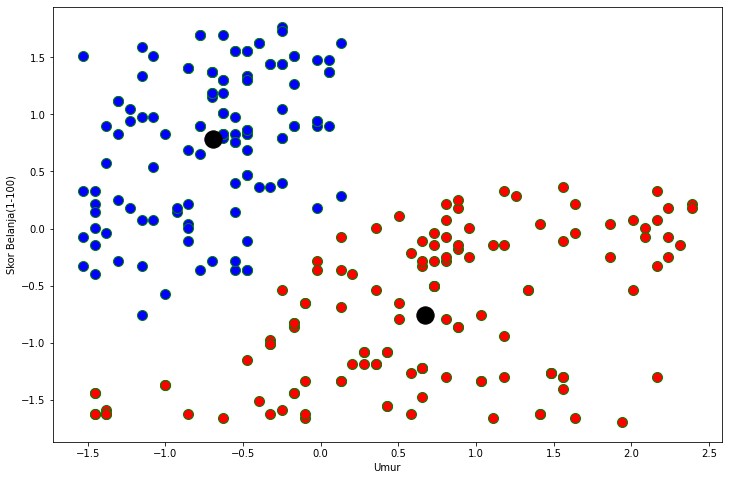

In [70]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Umur'][new_df.label_kmeans1 == 0],new_df['Skor Belanja (1-100)'][new_df.label_kmeans1 == 0],c='blue', s=100, edgecolor='green' )
plt.scatter(new_df['Umur'][new_df.label_kmeans1 == 1],new_df['Skor Belanja (1-100)'][new_df.label_kmeans1 == 1],c='red', s=100, edgecolor='green' )

plt.scatter(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1], c='k', s=300)

plt.xlabel("Umur")
plt.ylabel("Skor Belanja(1-100)")
plt.show()

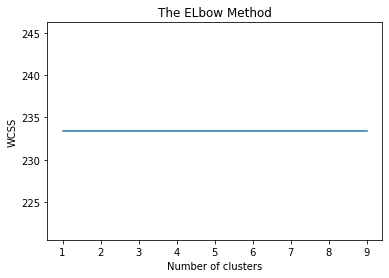

In [71]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10), wcss)
plt.title("The ELbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [72]:
kmeans2 = KMeans(n_clusters=3, random_state=42).fit(df_std)
labels2 = kmeans2.labels_
new_df['label2_kmeans2'] = labels2

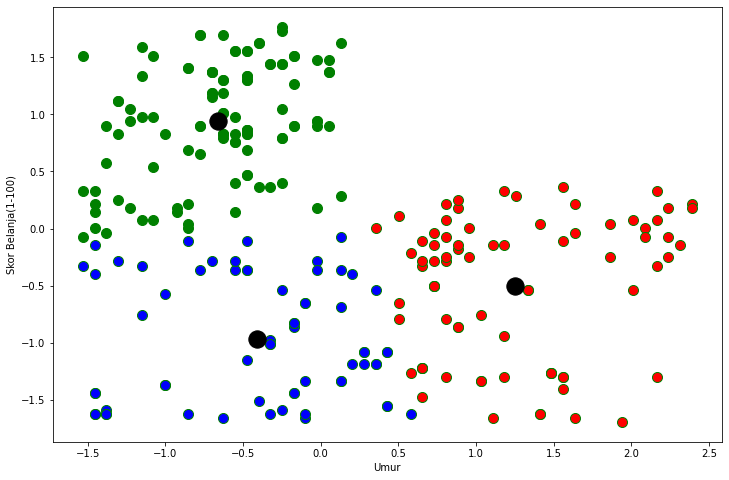

In [74]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Umur'][new_df.label2_kmeans2 == 0],new_df['Skor Belanja (1-100)'][new_df.label2_kmeans2 == 0],c='blue', s=100, edgecolor='green' )
plt.scatter(new_df['Umur'][new_df.label2_kmeans2 == 1],new_df['Skor Belanja (1-100)'][new_df.label2_kmeans2 == 1],c='red', s=100, edgecolor='green' )
plt.scatter(new_df['Umur'][new_df.label2_kmeans2 == 2],new_df['Skor Belanja (1-100)'][new_df.label2_kmeans2 == 2],c='green', s=100, edgecolor='green' )

plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1], c='k', s=300)

plt.xlabel("Umur")
plt.ylabel("Skor Belanja(1-100)")
plt.show()

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:

terlihat bahwa bisa membagi 3 bagian, yaitu umur muda dengan pembelian sedikit, umur muda dengan pembelian banyak, dan umur tua dengan pembelian sedikit. Disini mungkin bisa di berikan diskon khusus bagi kumpulan umur muda dan pembeliannya banyak agar mereka bisa lebih menaikan frekuensi pembeliannya. Sedangkan untuk umur tua, bisa diberikan bahan bahan sesuai kebutuhan mereka saja, karena akan sangat merugikan bila menyediakan barang yang bukan kebutuhan dari mereka. 
